In [31]:
# import python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [32]:
df = pd.read_excel('/content/Superstore_USA.xlsx')
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


# **Data Wrangling**

In [33]:
df.shape

(9426, 24)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [35]:
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [36]:
df['Product Base Margin'].fillna(df['Product Base Margin'].mean(), inplace=True)

In [37]:
df.nunique()

Row ID                  9426
Order Priority             6
Discount                  16
Unit Price               751
Shipping Cost            652
Customer ID             2703
Customer Name           2703
Ship Mode                  3
Customer Segment           4
Product Category           3
Product Sub-Category      17
Product Container          7
Product Name            1263
Product Base Margin       52
Region                     4
State or Province         49
City                    1424
Postal Code             1697
Order Date              1419
Ship Date               1450
Profit                  8984
Quantity ordered new     112
Sales                   8674
Order ID                6455
dtype: int64

In [38]:
df['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [39]:
df['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [40]:
df['Order Priority'].replace('Critical ', 'Critical', inplace = True)

# **Order Priority**

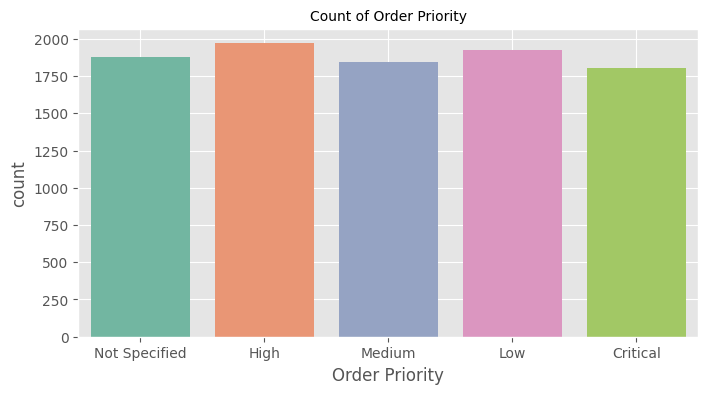

In [60]:
style.use('ggplot')
plt.figure(figsize=(8,4))
sns.countplot(x='Order Priority', hue= 'Order Priority', palette='Set2', data=df)

plt.title('Count of Order Priority', fontsize= 10)
plt.grid(True, color='w')
plt.show()

*The Count of Order Priority chart indicates that there is not much difference, but high and low periority counts are slightly above other bars.*  

# **Ship Mode**

In [42]:
df['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

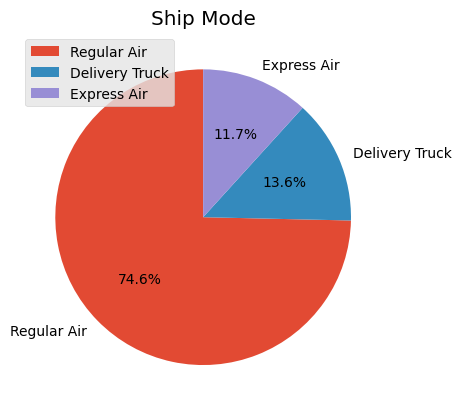

In [43]:
ax = plt.pie(df['Ship Mode'].value_counts(), labels=df['Ship Mode'].value_counts().index, autopct='%1.1f%%', startangle=90)

plt.title('Ship Mode')
plt.legend(loc= 2)
plt.show()

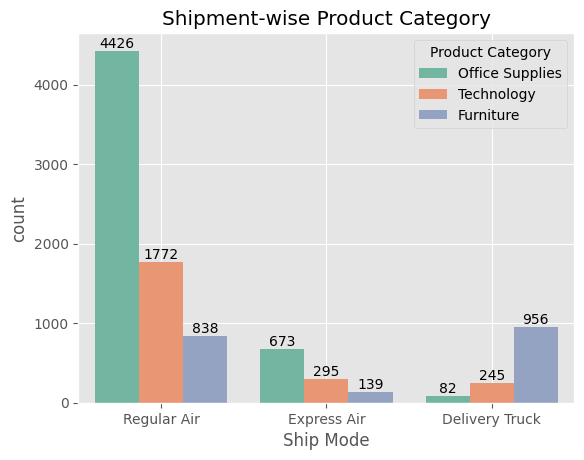

In [44]:
ax = sns.countplot(x='Ship Mode', hue= 'Product Category', palette='Set2', data=df)

for bars in ax.containers:
  ax.bar_label(bars)

plt.title('Shipment-wise Product Category')
plt.grid(True, color='w')
plt.show()

*The shipment-wise product category chart indicates that most consumers prefer office supplies (4426) to ship in regular air, followed by technology (1772), and furniture (838).*

# **Customer Segment**

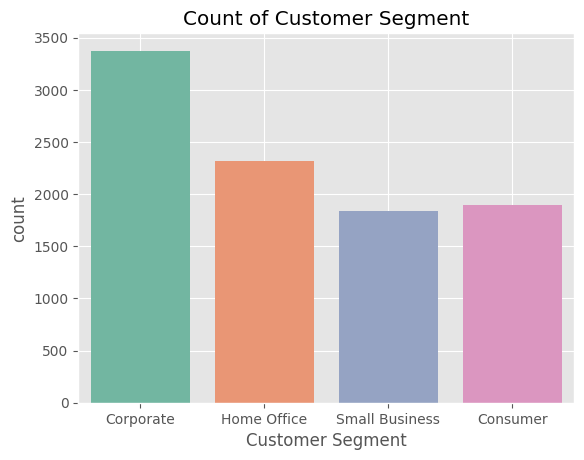

In [45]:
sns.countplot(x='Customer Segment', hue = 'Customer Segment', palette='Set2', data=df)

plt.title('Count of Customer Segment')
plt.grid(True, color='w')
plt.show()

*The count of customer segments chart indicates that most of the buyers are from corporate and home offices.*

# **Product Category and Product Sub-Category**

In [46]:
df['Product Category'].value_counts()

Product Category
Office Supplies    5181
Technology         2312
Furniture          1933
Name: count, dtype: int64

In [47]:
df['Product Sub-Category'].value_counts()

Product Sub-Category
Paper                             1379
Binders and Binder Accessories    1028
Telephones and Communication       992
Office Furnishings                 883
Computer Peripherals               846
Pens & Art Supplies                721
Storage & Organization             610
Appliances                         492
Chairs & Chairmats                 440
Tables                             404
Office Machines                    376
Labels                             329
Envelopes                          272
Bookcases                          206
Rubber Bands                       195
Scissors, Rulers and Trimmers      155
Copiers and Fax                     98
Name: count, dtype: int64

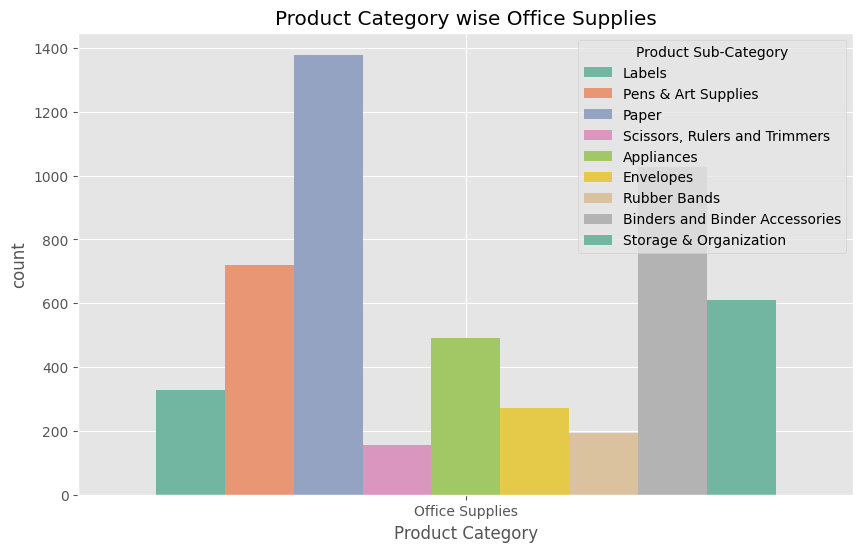

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x='Product Category', hue = 'Product Sub-Category', palette='Set2', data=df[df['Product Category'] == 'Office Supplies'])

plt.title('Product Category wise Office Supplies')
plt.grid(True, color='w')
plt.show()

*The product category-wise office supplies chart indicates that most of the product category offices buyers buy paper, binders and binder accessories, and pens and art supplies.*

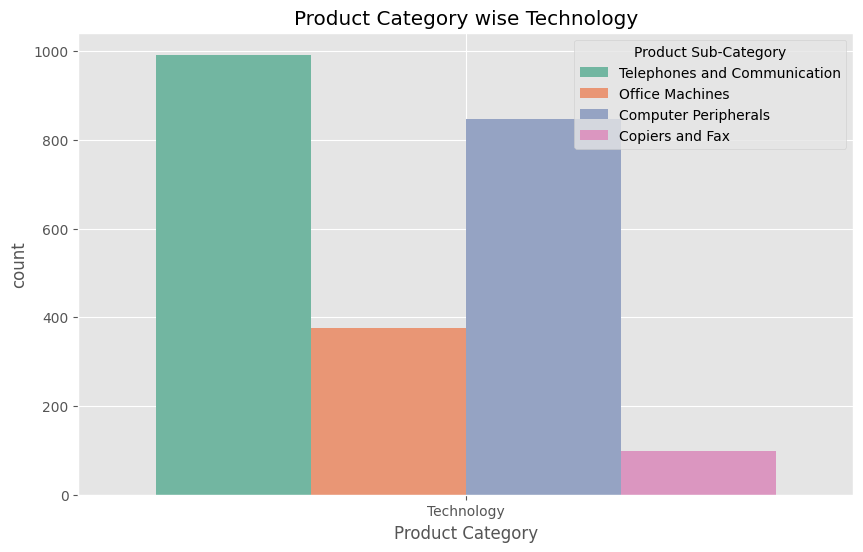

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(x='Product Category', hue = 'Product Sub-Category', palette='Set2', data=df[df['Product Category'] == 'Technology'])

plt.title('Product Category wise Technology')
plt.grid(True, color='w')
plt.show()

*The product category-wise technology chart indicates that most of the product category-wise technology buyers buy telephones and communication, computer peripherals, and office machines.*

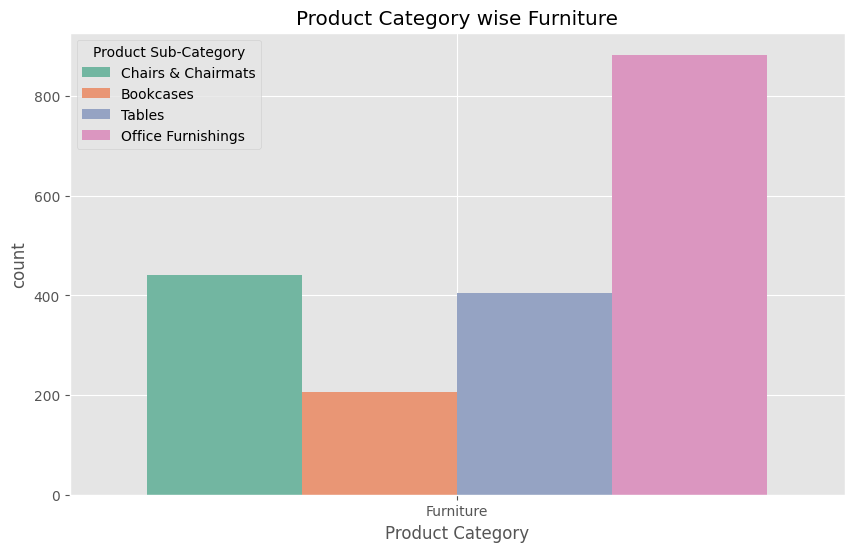

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(x='Product Category', hue = 'Product Sub-Category', palette='Set2', data=df[df['Product Category'] == 'Furniture'])

plt.title('Product Category wise Furniture')
plt.grid(True, color='w')
plt.show()

*The product category-wise furniture chart indicates that most of the product category-wise furniture buyers buy office furnishings, chairs, chairmats, and tables.*

# **Product Category wise Profit**

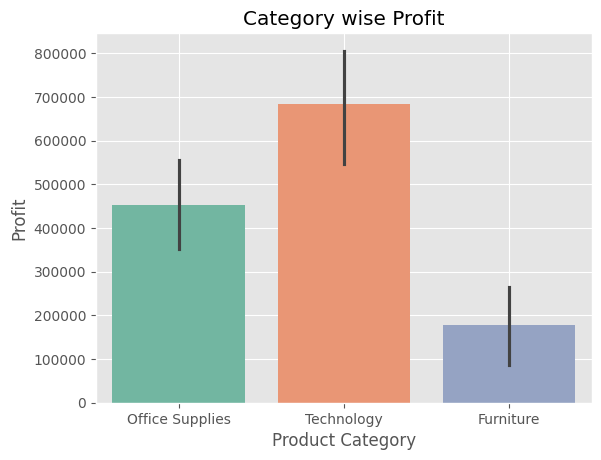

In [51]:
sns.barplot(x='Product Category', y='Profit', hue= 'Product Category', palette='Set2', estimator= 'sum', data=df)

plt.title('Category wise Profit')
plt.grid(True, color='w')
plt.show()

*The category-wise profit chart indicates that most of the profits are coming from Technology category generates the highest profit, significantly more than the other two categories.*

# **Product Category wise Profit**

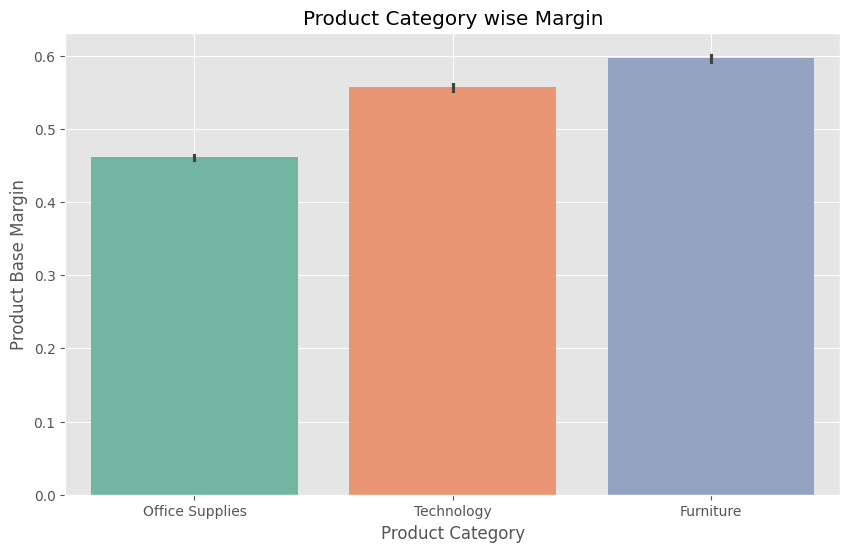

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product Category', y = 'Product Base Margin', hue= 'Product Category', palette='Set2', data = df)

plt.title('Product Category wise Margin')
plt.grid(True, color='w')
plt.show()

*The product category-wise margin indicates that furniture has the highest product base margin, slightly above 0.6, and technology comes in second with a product base margin of slightly above 0.5.*

# **Order Year**

In [53]:
df['Order Year'] = df['Order Date'].dt.year

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [55]:
df['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

In [56]:
x = df['Order Year'].value_counts().index
y = df['Order Year'].value_counts().values

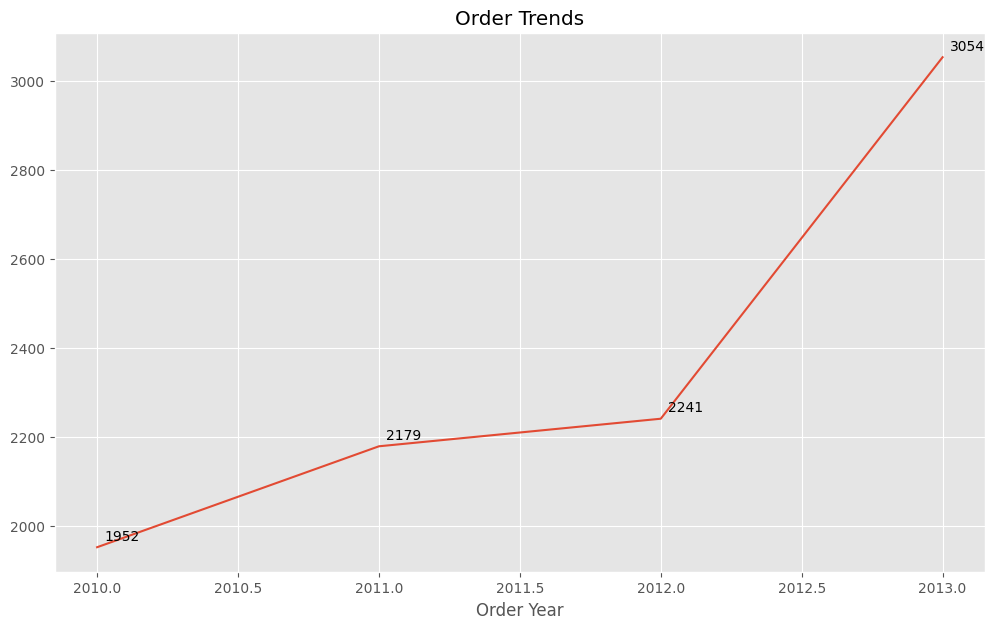

In [57]:
plt.figure(figsize=(12,7))
sns.lineplot(x=x, y=y)

for i, j in zip(x, y):
    plt.annotate(f'{j}', xy=(i, j), xytext=(5, 5), textcoords='offset points')

plt.title('Order Trends')
plt.grid(True, color='w')
plt.show()

*The order trends chart indicates that the order trends have consistently increased from 2010 to 2013, with a significant jump in 2013.*

# **State or Province**

In [58]:
x = df['State or Province'].value_counts().index[:5]
y = df['State or Province'].value_counts().values[:5]

<ipython-input-59-ea0ab2039498>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= x, y= y, palette='Set2')


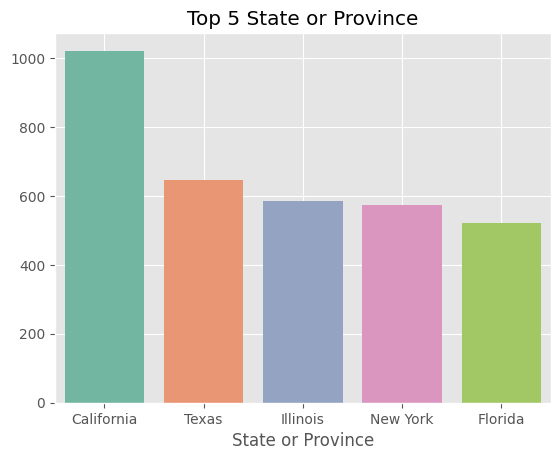

In [59]:
sns.barplot(x= x, y= y, palette='Set2')

plt.title('Top 5 State or Province')
plt.grid(True, color='w')
plt.show()

*The Top 5 State or Province chart indicates that California leads significantly with the highest value, surpassing the other states by a considerable margin.*

***Conclusion:***


* *The customer in the corporate segment living in California and Texas ordered high priority for most of the products, to office supplies (paper, binders and binder accessories, and pens and art supplies), to technology (telephones and communication, computer peripherals, and office machines), and to furniture (office furnishings, chairs, chairmats, and tables), prefer ship mode regular, and most of the profit is coming from technology and office supplies, order trends have consistently increased from 2010 to 2013, with a significant jump in 2013.*